In [1]:
# 標準
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import STL
# 自作
import my_function
import time_dependent_tree
import graft_regression_tree

In [2]:
np.random.seed(314) # 乱数シードを314に設定
# 合成波の作成
syn_t = my_function.make_wave(0.5, 1.0, 3.0, 100)[0]
syn_y = my_function.make_wave(0.5, 1.0, 3.0, 100)[1] + my_function.make_wave(0.75, 1.7, 3.0, 100)[1] + 0.05 * np.random.randn(len(syn_t))

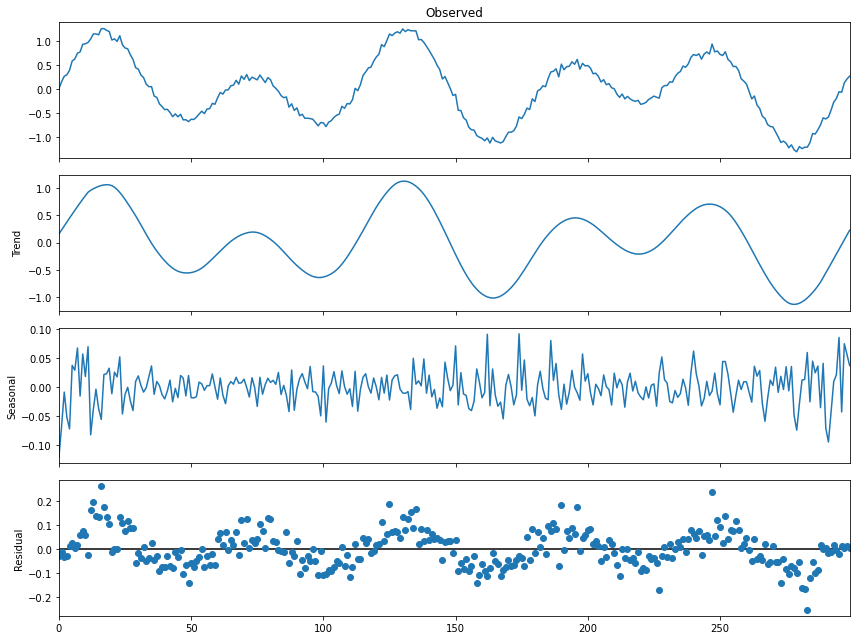

In [3]:
# STL分解
stl=STL(syn_y, period=12, robust=True)
stl_series = stl.fit()
# STL分解結果のグラフ化
plt.rcParams['figure.figsize'] = [12, 9]
stl_series.plot()
plt.show()

In [4]:
# データの整形
raw_x, raw_y = my_function.sliding_window(syn_y)
trend_x, trend_y = my_function.sliding_window(stl_series.trend)
seasonal_x, seasonal_y = my_function.sliding_window(stl_series.seasonal)
resid_x, resid_y = my_function.sliding_window(stl_series.resid)

# データの分割
raw_x_train, raw_x_test, raw_y_train, raw_y_test = train_test_split(raw_x, raw_y, test_size=0.1, shuffle=False)
trend_x_train, trend_x_test, trend_y_train, trend_y_test = train_test_split(trend_x, trend_y, test_size=0.1, shuffle=False)
seasonal_x_train, seasonal_x_test, seasonal_y_train, seasonal_y_test = train_test_split(seasonal_x, seasonal_y, test_size=0.1, shuffle=False)
resid_x_train, resid_x_test, resid_y_train, resid_y_test = train_test_split(resid_x, resid_y, test_size=0.1, shuffle=False)

In [5]:
trend_tdtree = time_dependent_tree.TimeDependentTree(trend_x_train, raw_y_train, trend_x_test, raw_y_test, 5, 5)
seasonal_tdtree = time_dependent_tree.TimeDependentTree(seasonal_x_train, raw_y_train, seasonal_x_test, raw_y_test, 5, 5)
resid_tdtree = time_dependent_tree.TimeDependentTree(resid_x_train, raw_y_train, resid_x_test, raw_y_test, 5, 5)

In [6]:
trend_tdtree.train()
seasonal_tdtree.train()
resid_tdtree.train()

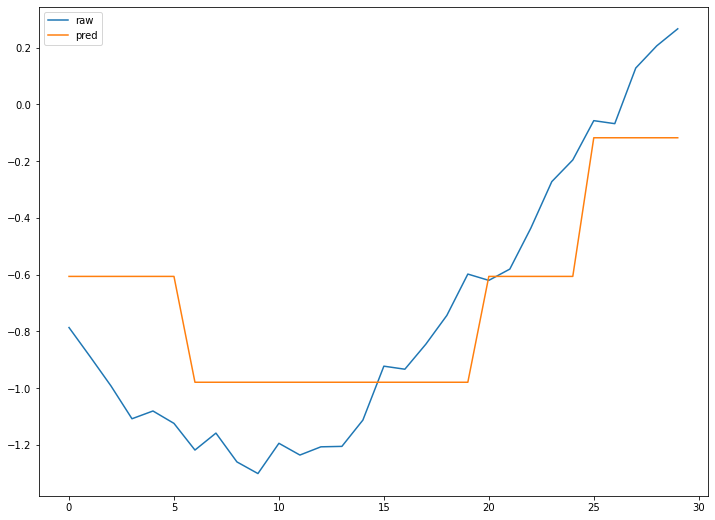

In [7]:
plt.plot(raw_y_test, label='raw')
plt.plot(trend_tdtree.predict(), label='pred')
plt.legend()
plt.show()

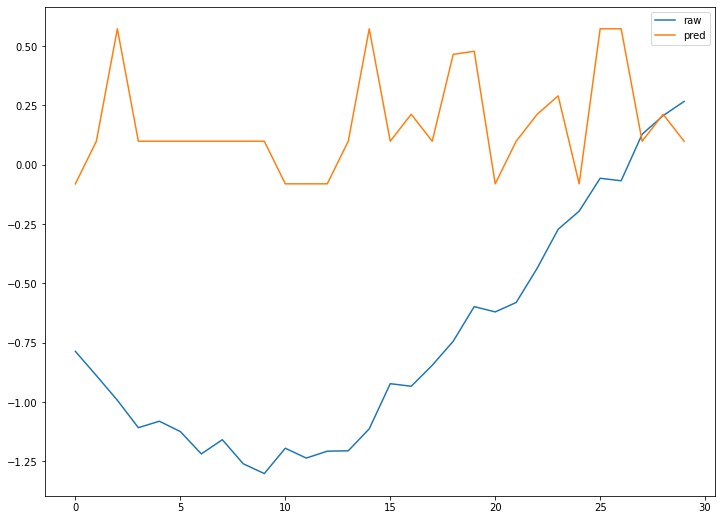

In [8]:
plt.plot(raw_y_test, label='raw')
plt.plot(seasonal_tdtree.predict(), label='pred')
plt.legend()
plt.show()

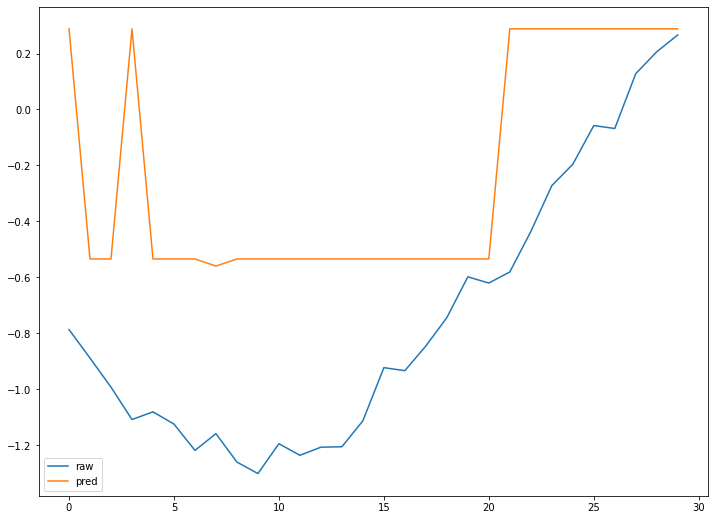

In [9]:
plt.plot(raw_y_test, label='raw')
plt.plot(resid_tdtree.predict(), label='pred')
plt.legend()
plt.show()

In [10]:
trend_tdtree.tree_df

,n,mean,depth,eval,feature_index,threshold,leaf
0,265,0.08709,0,0.327758,0,0.293216,False
1,167,-0.256779,1,0.172022,1,-0.90168,False
2,98,0.673072,1,0.13014,1,0.323301,False
3,10,-0.979749,2,100000000,-1,None,True
4,157,-0.21073,2,0.133266,2,0.085208,False
5,5,-0.090597,2,100000000,-1,None,True
6,93,0.714129,2,0.098929,2,0.856429,False
7,-1,NaN,3,NaN,NaN,NaN,False
8,-1,NaN,3,NaN,NaN,NaN,False
9,122,-0.358235,3,0.081598,3,-0.313566,False


In [11]:
seasonal_tdtree.tree_df

,n,mean,depth,eval,feature_index,threshold,leaf
0,265,0.08709,0,0.695551,0,-0.055642,False
1,5,0.572107,1,100000000,-1,None,True
2,260,0.077763,1,0.736128,1,0.036626,False
3,-1,NaN,2,NaN,NaN,NaN,False
4,-1,NaN,2,NaN,NaN,NaN,False
5,241,0.061161,2,0.725166,2,0.036626,False
6,19,0.288342,2,0.640489,2,0.011558,False
7,-1,NaN,3,NaN,NaN,NaN,False
8,-1,NaN,3,NaN,NaN,NaN,False
9,-1,NaN,3,NaN,NaN,NaN,False


In [12]:
resid_tdtree.tree_df

,n,mean,depth,eval,feature_index,threshold,leaf
0,265,0.08709,0,0.428259,0,0.172923,False
1,258,0.065408,1,0.42063,1,0.136422,False
2,7,0.88625,1,100000000,-1,None,True
3,248,0.03258,2,0.408467,2,-0.044126,False
4,10,0.879528,2,100000000,-1,None,True
5,-1,NaN,2,NaN,NaN,NaN,False
6,-1,NaN,2,NaN,NaN,NaN,False
7,69,-0.4956,3,0.184352,3,0.021964,False
8,179,0.236181,3,0.31747,3,-0.072276,False
9,-1,NaN,3,NaN,NaN,NaN,False


In [13]:
# データのまとめ
x_test_ls = [trend_x_test, seasonal_x_test, resid_x_test]
tdtree_ls = [trend_tdtree, seasonal_tdtree, resid_tdtree]

In [14]:
grtree = graft_regression_tree.GraftRegressionTree(raw_y_test, tdtree_ls)

In [15]:
grtree.build_tree(target_depth=0, tdtree_index=0)
grtree.build_tree(target_depth=1, tdtree_index=0)
grtree.build_tree(target_depth=2, tdtree_index=2)
grtree.build_tree(target_depth=3, tdtree_index=2)
grtree.build_tree(target_depth=4, tdtree_index=2)
grtree.predict(x_test_ls)

[0.8795279610044707,
 0.8795279610044707,
 0.8795279610044707,
 0.8795279610044707,
 0.8795279610044707,
 0.8795279610044707,
 -0.5344857023367254,
 -0.5600119683785852,
 -0.5344857023367254,
 -0.5344857023367254,
 -0.5344857023367254,
 -0.5344857023367254,
 -0.5344857023367254,
 -0.5344857023367254,
 -0.5344857023367254,
 -0.5344857023367254,
 -0.5344857023367254,
 -0.5344857023367254,
 -0.5344857023367254,
 -0.5344857023367254,
 0.8795279610044707,
 0.8795279610044707,
 0.8795279610044707,
 0.8795279610044707,
 0.8795279610044707,
 0.8795279610044707,
 0.8795279610044707,
 0.8795279610044707,
 0.8795279610044707,
 0.8795279610044707]